In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn import linear_model
os.chdir("E:\\Titanic\\titanic")
from sklearn import ensemble
from matplotlib.font_manager import FontProperties
font=FontProperties(fname=r"C:\\Windows\\Fonts\\msyh.ttf",size=12)

D:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### 初步探索数据

In [2]:
data=pd.read_csv('train.csv',header=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 数据初步分析

#### 1、乘客各属性

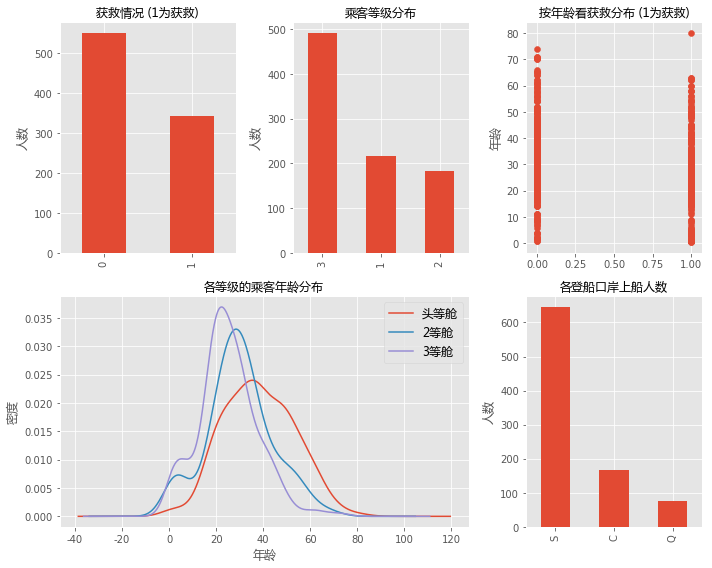

In [5]:
# plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.style.use('ggplot')
fig=plt.figure(figsize=(10,8)) #调整图形大小
plt.subplot2grid((2,3),(0,0))
data.Survived.value_counts().plot(kind='bar')# 条形图 
plt.title(u"获救情况 (1为获救)",fontproperties=font) # 标题
plt.ylabel(u"人数",fontproperties=font)  

plt.subplot2grid((2,3),(0,1))
data.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"人数",fontproperties=font)
plt.title(u"乘客等级分布",fontproperties=font)

plt.subplot2grid((2,3),(0,2))
plt.scatter(data.Survived, data.Age)
plt.ylabel(u"年龄",fontproperties=font)    # 设定纵坐标名称
plt.grid(b=True, which='major', axis='y') 
plt.title(u"按年龄看获救分布 (1为获救)",fontproperties=font)

plt.subplot2grid((2,3),(1,0),colspan=2)
data.Age[data.Pclass == 1].plot(kind='kde')   
data.Age[data.Pclass == 2].plot(kind='kde')
data.Age[data.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄",fontproperties=font)# plots an axis lable
plt.ylabel(u"密度",fontproperties=font) 
plt.title(u"各等级的乘客年龄分布",fontproperties=font)
plt.legend((u'头等舱',u'2等舱',u'3等舱'),loc='best',prop=font) # legend参数

plt.subplot2grid((2,3),(1,2))
data.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数",fontproperties=font)
plt.ylabel(u"人数",fontproperties=font) 
plt.tight_layout() #防止图形之间重叠
plt.show()


#### 2、属性与获救结果的关联统计

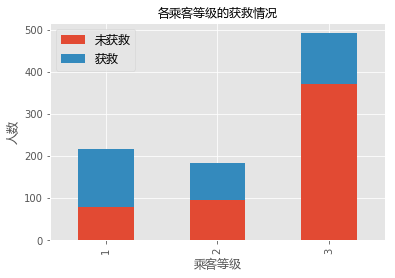

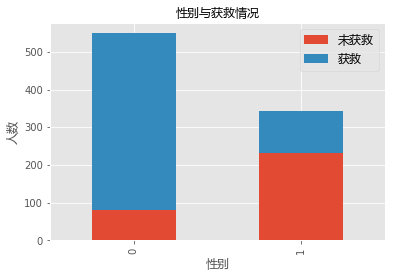

In [6]:

Survived_0=data.Pclass[data.Survived==0].value_counts()
Survived_1=data.Pclass[data.Survived==1].value_counts()
df=pd.DataFrame({'获救':Survived_1,'未获救':Survived_0})
df.plot(kind='bar',stacked=True)
plt.title('各乘客等级的获救情况',fontproperties=font)
plt.xlabel('乘客等级',fontproperties=font)
plt.ylabel('人数',fontproperties=font)
plt.legend(('未获救','获救'),loc='best',prop=font)

Survived_m=data.Survived[data.Sex=='male'].value_counts()
Survived_f=data.Survived[data.Sex=='female'].value_counts()
dff=pd.DataFrame({'男性':Survived_m,'女性':Survived_f})
dff.plot(kind='bar',stacked=True)
plt.title('性别与获救情况',fontproperties=font)
plt.xlabel('性别',fontproperties=font)
plt.ylabel('人数',fontproperties=font)
plt.legend(('未获救','获救'),loc='best',prop=font)
plt.show()


#### 不同舱级下不同性别的获救情况汇总

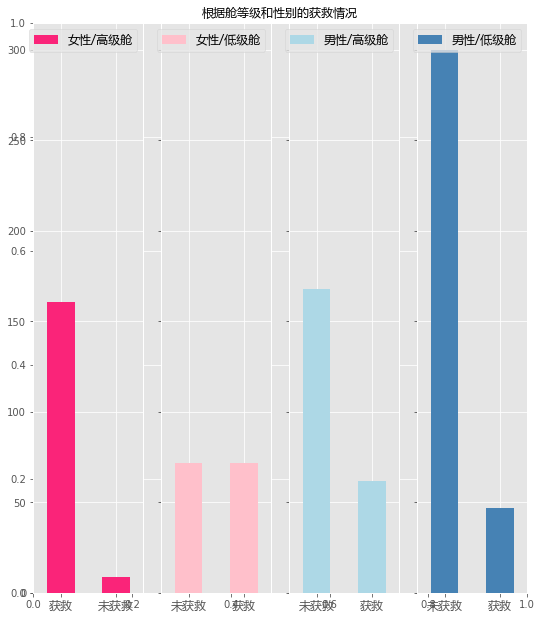

In [7]:
fig=plt.figure(figsize=(8,9))
plt.style.use('ggplot')
plt.title('根据舱等级和性别的获救情况',fontproperties=font)
ax1=fig.add_subplot(141)
data.Survived[data.Sex == 'female'][data.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"获救", u"未获救"], rotation=0,fontproperties=font)
ax1.legend([u"女性/高级舱"], loc='best',prop=font)

ax2=fig.add_subplot(142, sharey=ax1)
data.Survived[data.Sex == 'female'][data.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0,fontproperties=font)
plt.legend([u"女性/低级舱"], loc='best',prop=font)

ax3=fig.add_subplot(143, sharey=ax1)
data.Survived[data.Sex == 'male'][data.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"未获救", u"获救"], rotation=0,fontproperties=font)
plt.legend([u"男性/高级舱"], loc='best',prop=font)

ax4=fig.add_subplot(144, sharey=ax1)
data.Survived[data.Sex == 'male'][data.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"未获救", u"获救"], rotation=0,fontproperties=font)
plt.legend([u"男性/低级舱"], loc='best',prop=font)
plt.tight_layout()

plt.show()


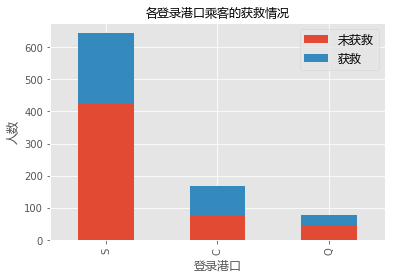

In [8]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data.Embarked[data.Survived == 0].value_counts()
Survived_1 = data.Embarked[data.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各登录港口乘客的获救情况",fontproperties=font)
plt.xlabel(u"登录港口",fontproperties=font) 
plt.ylabel(u"人数",fontproperties=font) 
plt.legend(('未获救','获救'),loc='best',prop=font)
plt.show()

In [15]:
g = data.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

In [18]:
g = data.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

In [20]:
data.Cabin.value_counts()

B96 B98            4
C23 C25 C27        4
G6                 4
F2                 3
E101               3
C22 C26            3
D                  3
F33                3
B49                2
C124               2
D36                2
F4                 2
B77                2
B22                2
C65                2
B28                2
E33                2
E24                2
C92                2
C52                2
F G73              2
D20                2
B35                2
C125               2
B57 B59 B63 B66    2
E8                 2
C83                2
D26                2
D33                2
C78                2
                  ..
A10                1
B42                1
D15                1
A14                1
C50                1
C91                1
C110               1
E63                1
D47                1
C90                1
D45                1
C95                1
C46                1
C104               1
D10 D12            1
E49                1
F E69        

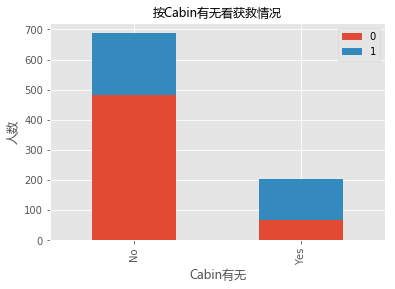

In [41]:
fig = plt.figure()
Survived_cabin = data.Survived[pd.notnull(data.Cabin)].value_counts()
Survived_nocabin = data.Survived[pd.isnull(data.Cabin)].value_counts()
df=pd.DataFrame({'Yes':Survived_cabin, 'No':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"按Cabin有无看获救情况",fontproperties=font)
plt.xlabel(u"Cabin有无",fontproperties=font) 
plt.ylabel(u"人数",fontproperties=font)
plt.show()


In [42]:
df

,0,1
No,481,206
Yes,68,136


### 数据预处理
#### 利用rf来拟合年龄的缺失值

In [61]:
def set_missing_ages(df):
    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
    y = known_age[:, 0]
    X = known_age[:, 1:]
    rfr = ensemble.RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    predictedAges = rfr.predict(unknown_age[:, 1::])
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    return df, rfr
def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df
data_train, rfr = set_missing_ages(data)
data_train = set_Cabin_type(data)

In [62]:
rfr

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [64]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### logistic回归建模要求数据是数值型数据，所以需要首先对类别型数据进行one-hot编码

In [122]:
dummies_Cabin = pd.get_dummies(data['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(data['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(data['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(data['Pclass'], prefix= 'Pclass')

df = pd.concat([data, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0


In [124]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
df['Age_scaled'] = scaler.fit_transform(df['Age'].reshape(-1,1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].reshape(-1,1))
# df.drop(['Age','Fare'], axis=1, inplace=True)
dfff=df
dfff.head(10)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561380,-0.502445
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613171,0.786845
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267742,-0.488854
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392942,0.420730
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392942,-0.486337
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1,-0.426384,-0.478116
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0,1.787722,0.395814
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1,-2.029569,-0.224083
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1,-0.194333,-0.424256
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0,-1.148655,-0.042956


In [125]:
dfff.drop(['Age','Fare'],axis=1,inplace=True)

### 开始logistic建模

In [127]:
from sklearn import linear_model

# 用正则取出我们要的属性值
train_df = dfff.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()
y = train_np[:, 0]
X = train_np[:, 1:]
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y) 
clf


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

In [130]:
data_test = pd.read_csv("E:\\Titanic\\titanic\\test.csv")
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0
# 接着我们对test_data做和train_data中一致的特征变换
# 首先用同样的RandomForestRegressor模型填上丢失的年龄
tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].as_matrix()
# 根据特征属性X预测年龄并补上
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')


df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].reshape(-1,1))
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].reshape(-1,1))
df_test.drop(['Age','Fare'],axis=1, inplace=True)


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


### 模型结果预测

In [132]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("E:\\Titanic\\titanic\\logistic_regression_predictions.csv", index=False)


## iloc和loc

In [140]:
data1=pd.DataFrame({'A':[1,23,4,5,6,7],'B':[5,4,2,6,85,10],'C':[45,78,21,52,41,1],'D':[12,4,45,6,33,12]},
                  index=['2010-10-01','2014-10-10','2011-01-12','2013-10-12','2010-10-24','2019-07-15'])
data1

,A,B,C,D
2010-10-01,1,5,45,12
2014-10-10,23,4,78,4
2011-01-12,4,2,21,45
2013-10-12,5,6,52,6
2010-10-24,6,85,41,33
2019-07-15,7,10,1,12


In [142]:
data1.loc['2014-10-10']

A    23
B     4
C    78
D     4
Name: 2014-10-10, dtype: int64

In [145]:
data1.loc['2010-10-01':'2014-10-10']

,A,B,C,D
2010-10-01,1,5,45,12
2014-10-10,23,4,78,4


In [147]:
data1.loc[:,'B']

2010-10-01     5
2014-10-10     4
2011-01-12     2
2013-10-12     6
2010-10-24    85
2019-07-15    10
Name: B, dtype: int64

In [148]:
data1.loc[:,'A':'C']

,A,B,C
2010-10-01,1,5,45
2014-10-10,23,4,78
2011-01-12,4,2,21
2013-10-12,5,6,52
2010-10-24,6,85,41
2019-07-15,7,10,1


### DataFrame.fliter()函数

In [133]:
df=pd.DataFrame(np.array(([1,2,3],[4,5,6])),index=['mouse','rabbit'],columns=['one','two','three'])
df

,one,two,three
mouse,1,2,3
rabbit,4,5,6


In [135]:
df.filter(regex='e$',axis=1)

,one,three
mouse,1,3
rabbit,4,6


In [137]:
df.filter(regex='e*',axis=1)

,one,two,three
mouse,1,2,3
rabbit,4,5,6


In [138]:
df.filter(items=['one', 'three'])

,one,three
mouse,1,3
rabbit,4,6


In [139]:
df.filter(like='bbi', axis=0)

,one,two,three
rabbit,4,5,6
